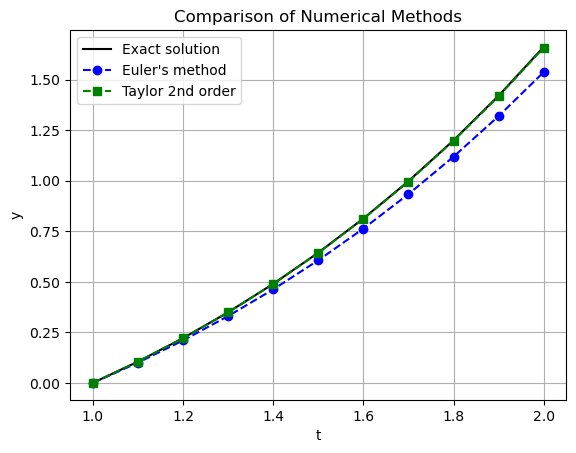

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 定義微分方程 f(t, y)
def f(t, y):
    return 1 + (y / t) + (y / t)**2

# 精確解
def exact_solution(t):
    return t * np.tan(np.log(t))

# y' 的導數對 y 的二次導數：f'(t, y)
# 根據鏈式法則與乘法法則，我們先求出 df/dt
def df_dt(t, y):
    dy_dt = f(t, y)
    term = y / t
    dterm_dt = (t * dy_dt - y) / t**2
    dterm2_dt = 2 * term * dterm_dt
    return dterm_dt + dterm2_dt

# Euler 方法
def euler_method(f, t0, y0, h, n):
    t_values = [t0]
    y_values = [y0]
    for i in range(n):
        y_new = y_values[-1] + h * f(t_values[-1], y_values[-1])
        t_new = t_values[-1] + h
        t_values.append(t_new)
        y_values.append(y_new)
    return np.array(t_values), np.array(y_values)

# Taylor 方法（2階）
def taylor_method(f, df_dt, t0, y0, h, n):
    t_values = [t0]
    y_values = [y0]
    for i in range(n):
        t_curr = t_values[-1]
        y_curr = y_values[-1]
        y_new = y_curr + h * f(t_curr, y_curr) + (h**2 / 2) * df_dt(t_curr, y_curr)
        t_new = t_curr + h
        t_values.append(t_new)
        y_values.append(y_new)
    return np.array(t_values), np.array(y_values)

# 參數設定
t0 = 1
y0 = 0
h = 0.1
n = int((2 - t0) / h)

# 計算解
t_euler, y_euler = euler_method(f, t0, y0, h, n)
t_taylor, y_taylor = taylor_method(f, df_dt, t0, y0, h, n)
y_exact = exact_solution(t_euler)

# 畫圖比較
plt.plot(t_euler, y_exact, 'k-', label='Exact solution')
plt.plot(t_euler, y_euler, 'bo--', label="Euler's method")
plt.plot(t_taylor, y_taylor, 'gs--', label="Taylor 2nd order")
plt.xlabel('t')
plt.ylabel('y')
plt.title('Comparison of Numerical Methods')
plt.legend()
plt.grid(True)
plt.show()


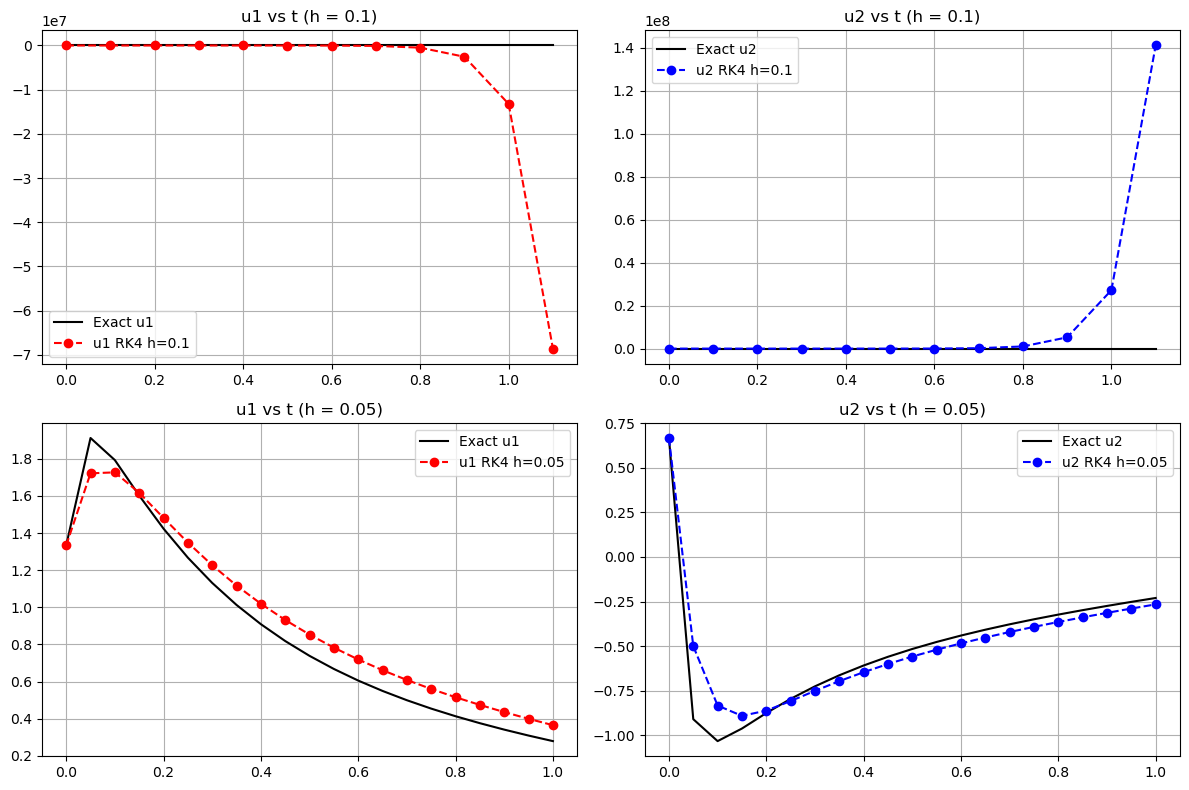

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# 定義微分方程系統
def f(t, u):
    u1, u2 = u
    du1 = 9*u1 + 24*u2 + 5*np.cos(t) - (1/3)*np.sin(t)
    du2 = -24*u1 - 52*u2 - 9*np.cos(t) + (1/3)*np.sin(t)
    return np.array([du1, du2])

# 精確解
def exact_u1(t):
    return 2*np.exp(-3*t) - np.exp(-39*t) + (1/3)*np.cos(t)

def exact_u2(t):
    return -np.exp(-3*t) + 2*np.exp(-39*t) - (1/3)*np.cos(t)

# Runge-Kutta 4 方法
def runge_kutta_4(f, t0, u0, h, t_end):
    t_values = [t0]
    u_values = [u0]
    t = t0
    u = u0
    while t < t_end:
        k1 = f(t, u)
        k2 = f(t + h/2, u + h/2 * k1)
        k3 = f(t + h/2, u + h/2 * k2)
        k4 = f(t + h, u + h * k3)
        u = u + (h/6)*(k1 + 2*k2 + 2*k3 + k4)
        t += h
        t_values.append(t)
        u_values.append(u)
    return np.array(t_values), np.array(u_values)

# 初始條件
t0 = 0
t_end = 1
u0 = np.array([4/3, 2/3])

# 設定圖形
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
steps = [0.1, 0.05]

for i, h in enumerate(steps):
    t_vals, u_vals = runge_kutta_4(f, t0, u0, h, t_end)
    u1_exact = exact_u1(t_vals)
    u2_exact = exact_u2(t_vals)

    row = 0 if h == 0.1 else 1

    # 畫 u1 圖
    axs[row, 0].plot(t_vals, u1_exact, 'k-', label='Exact u1')
    axs[row, 0].plot(t_vals, u_vals[:, 0], 'ro--', label=f'u1 RK4 h={h}')
    axs[row, 0].set_title(f'u1 vs t (h = {h})')
    axs[row, 0].legend()
    axs[row, 0].grid(True)

    # 畫 u2 圖
    axs[row, 1].plot(t_vals, u2_exact, 'k-', label='Exact u2')
    axs[row, 1].plot(t_vals, u_vals[:, 1], 'bo--', label=f'u2 RK4 h={h}')
    axs[row, 1].set_title(f'u2 vs t (h = {h})')
    axs[row, 1].legend()
    axs[row, 1].grid(True)

plt.tight_layout()
plt.show()
